<a href="https://colab.research.google.com/github/tuananh1006/Torch_Practice/blob/main/Dog_Cat_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d mmoreaux/audio-cats-and-dogs

Dataset URL: https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs
License(s): CC-BY-SA-3.0
 92% 89.0M/97.0M [00:01<00:00, 61.6MB/s]
100% 97.0M/97.0M [00:01<00:00, 60.8MB/s]


In [ ]:
!unzip audio-cats-and-dogs.zip

Archive:  audio-cats-and-dogs.zip
  inflating: cats_dogs/cat_1.wav     
  inflating: cats_dogs/cat_10.wav    
  inflating: cats_dogs/cat_100.wav   
  inflating: cats_dogs/cat_101.wav   
  inflating: cats_dogs/cat_102.wav   
  inflating: cats_dogs/cat_103.wav   
  inflating: cats_dogs/cat_105.wav   
  inflating: cats_dogs/cat_106.wav   
  inflating: cats_dogs/cat_107.wav   
  inflating: cats_dogs/cat_108.wav   
  inflating: cats_dogs/cat_109.wav   
  inflating: cats_dogs/cat_11.wav    
  inflating: cats_dogs/cat_110.wav   
  inflating: cats_dogs/cat_112.wav   
  inflating: cats_dogs/cat_113.wav   
  inflating: cats_dogs/cat_114.wav   
  inflating: cats_dogs/cat_115.wav   
  inflating: cats_dogs/cat_116.wav   
  inflating: cats_dogs/cat_117.wav   
  inflating: cats_dogs/cat_118.wav   
  inflating: cats_dogs/cat_119.wav   
  inflating: cats_dogs/cat_12.wav    
  inflating: cats_dogs/cat_120.wav   
  inflating: cats_dogs/cat_121.wav   
  inflating: cats_dogs/cat_122.wav   
  inflating: cat

## Start

Delete duplicate file

In [ ]:
for file_name in os.listdir('./cats_dogs'):
  if os.path.isfile('./cats_dogs/' + file_name):
    os.remove('./cats_dogs/' + file_name)

In [ ]:
os.rename('./cats_dogs/test/test','./cats_dogs/test/dogs')

In [ ]:
from pathlib import Path
def create_image_from_audio(type='train'):
  allow_animal=['cat','dog']
  for animal in allow_animal:
    animal_path=f"animal/{type}/{animal}"
    Path(animal_path).mkdir(parents=True, exist_ok=True)

In [ ]:
create_image_from_audio()

In [ ]:
import shutil

shutil.rmtree('animal/test')

In [ ]:
import torchaudio
data_waveform,sr=torchaudio.load('./cats_dogs/train/cat/cat_1.wav')

In [ ]:
import matplotlib.pyplot as plt
import torch
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)

# source: adapted from https://pytorch.org/audio/stable/tutorials/audio_io_tutorial.html
def plot_specgram(waveform, sample_rate, file_path = 'test2.png'):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    fig, axes = plt.subplots( num_channels, 1)
    fig.set_size_inches(10, 10)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    plt.gca().set_axis_off()
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    # plt.show(block=False)
    plt.savefig(file_path, bbox_inches='tight', pad_inches = 0)

In [ ]:
from pathlib import Path
def create_image_from_audio(type='train'):
  if type =='train':
    allow_animal=['cat','dog']
  if type =='test':
    allow_animal=['cats','dogs']
  for animal in allow_animal:
    animal_path=f"animal/{type}/{animal}"
    Path(animal_path).mkdir(parents=True, exist_ok=True)
    root_dir=f"cats_dogs/{type}/{animal}"
    for file_name in os.listdir(root_dir):
      if os.path.isfile(os.path.join(root_dir,file_name)):
        data_waveform,sr=torchaudio.load(os.path.join(root_dir,file_name))
        plot_specgram(data_waveform,sr,f"{animal_path}/{file_name}.png")

In [ ]:
create_image_from_audio(type='train')

In [ ]:
create_image_from_audio(type='test')

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
transform=transforms.Compose([
    transforms.Resize((100,100)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [ ]:
trainset=torchvision.datasets.ImageFolder(root='animal/train',transform=transform)

In [ ]:
testset=torchvision.datasets.ImageFolder(root='animal/test',transform=transform)

In [ ]:
train_loader=DataLoader(trainset,batch_size=16,shuffle=True)
test_loader=DataLoader(testset,batch_size=16,shuffle=False)

In [ ]:
img_0=iter(train_loader)
img,label=next(img_0)

In [ ]:
img.shape

torch.Size([16, 1, 100, 100])

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,6,3)  #98 98 6
    self.pool=nn.MaxPool2d(2,2)  # 49 49 6
    self.conv2=nn.Conv2d(6,16,3)  # 47 47 16
    self.fc1=nn.Linear(16*23*23,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,1)
    self.sigmoid=nn.Sigmoid()
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.sigmoid(self.fc3(x))
    return x

In [ ]:
model=MyModel()
loss_fn=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
losses=[]
epochs=10

In [ ]:

for epoch in range(epochs):
  for i,data in enumerate(train_loader,0):
    inputs,labels=data
    optimizer.zero_grad()
    outputs=model(inputs)
    loss=loss_fn(outputs.squeeze(1),labels.float())
    loss.backward()
    optimizer.step()
  losses.append(loss.item())
  print(f'epoch {epoch+1} loss: {loss.item()}')


epoch 1 loss: 0.6543526649475098
epoch 2 loss: 0.3684249520301819
epoch 3 loss: 0.5686712265014648
epoch 4 loss: 0.48283088207244873
epoch 5 loss: 0.17903532087802887
epoch 6 loss: 0.3230721354484558
epoch 7 loss: 0.15756407380104065
epoch 8 loss: 0.05421293154358864
epoch 9 loss: 0.0331166535615921
epoch 10 loss: 0.09854792058467865


<Axes: >

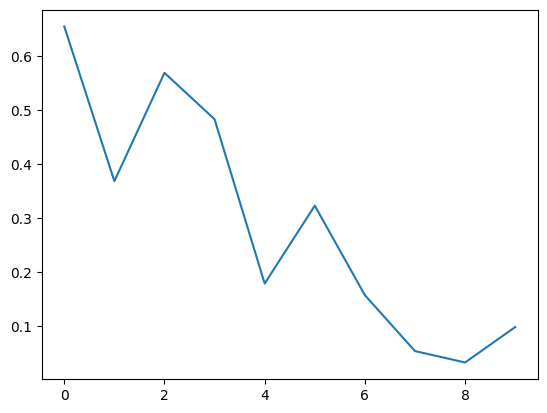

In [ ]:
import seaborn as sns
sns.lineplot(x=range(epochs),y=losses)

In [ ]:
y_pred=[]
y_test=[]
with torch.no_grad():
  for data in test_loader:
    inputs,labels=data
    outputs=model(inputs).round()
    y_pred.extend(outputs.numpy())
    y_test.extend(labels.numpy())

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9104477611940298

In [ ]:
from collections import Counter
Counter(y_test).most_common()[0][1]/len(y_test)

0.582089552238806

In [ ]:
#display confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)

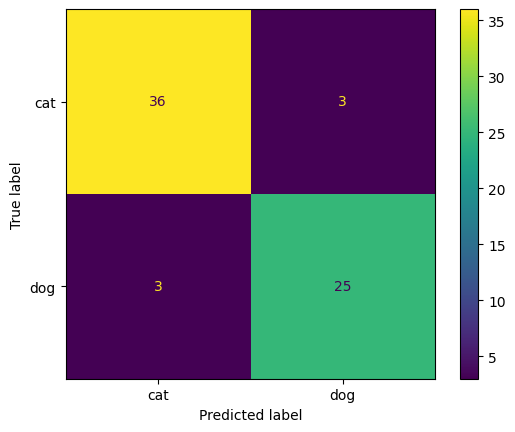

In [ ]:
cd=ConfusionMatrixDisplay(cm,display_labels=['cat','dog'])
cd.plot()